In [7]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import xarray as xr
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [8]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [9]:
hf.keys()

<KeysViewHDF5 ['data']>

In [10]:
data = np.array(hf.get('data'))

In [11]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [12]:
hf.close()

## Problem 1

Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().

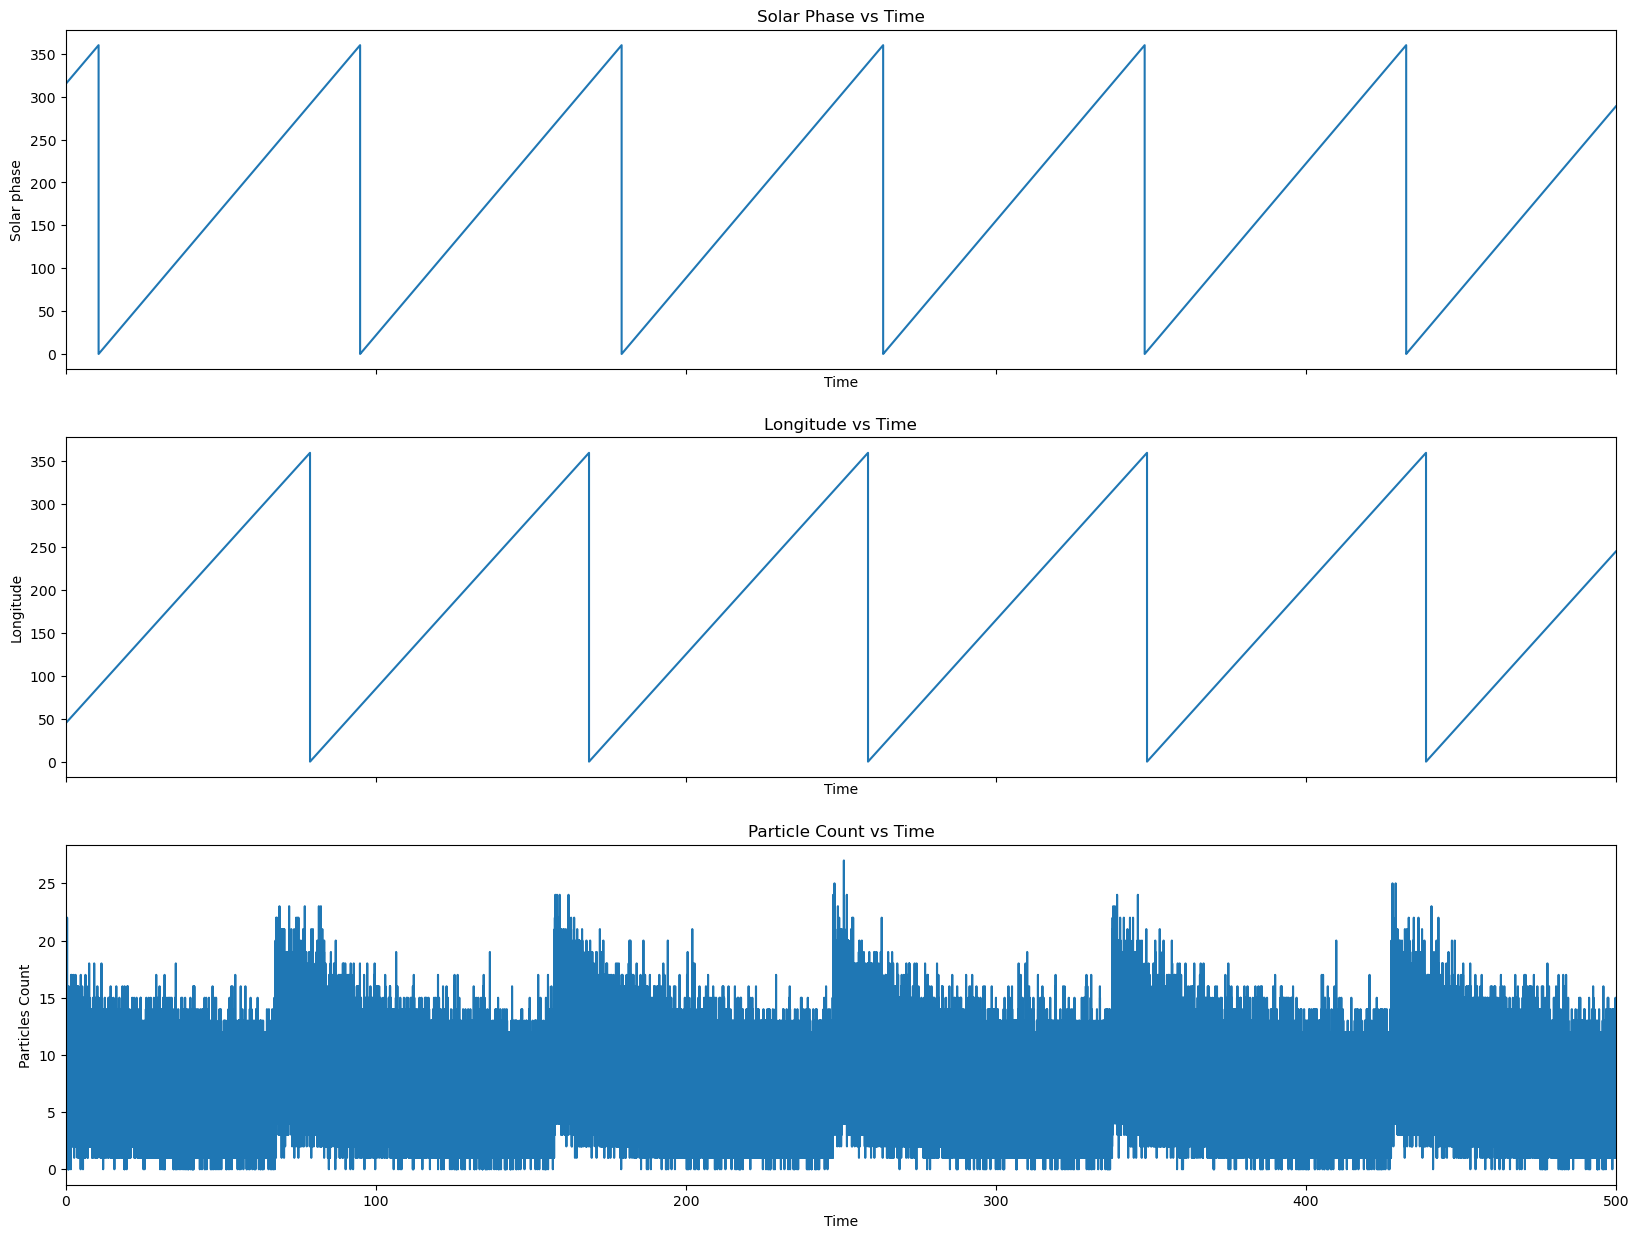

In [13]:
n = 1000000
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot((data[0, :n] - data[0, 0])/60, data[1, :n])
ax[0].set_title('Solar Phase vs Time')
ax[0].set_ylabel('Solar phase')
ax[0].set_xlabel('Time')
ax[0].set_xlim(0, 500)
ax[1].plot((data[0, :n] - data[0, 0])/60, data[2, :n])
ax[1].set_title('Longitude vs Time')
ax[1].set_ylabel('Longitude')
ax[1].set_xlabel('Time')
ax[1].set_xlim(0, 500)
ax[2].plot((data[0, :n] - data[0, 0])/60, data[3, :n])
ax[2].set_title('Particle Count vs Time')
ax[2].set_ylabel('Particles Count')
ax[2].set_xlabel('Time')
ax[2].set_xlim(0, 500)
plt.show()

Here is the 1000000 datas VS 500 minutes. The first plot has a period smaller than second one because of the earth's rotation. From second plot, we can see the orbit is about $\frac{500}{5.5} = 90$ minutes. I see signal contamination in my data due to the periodic shape.

<ipython-input-14-b1f2414889df>:3: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(p1[3])


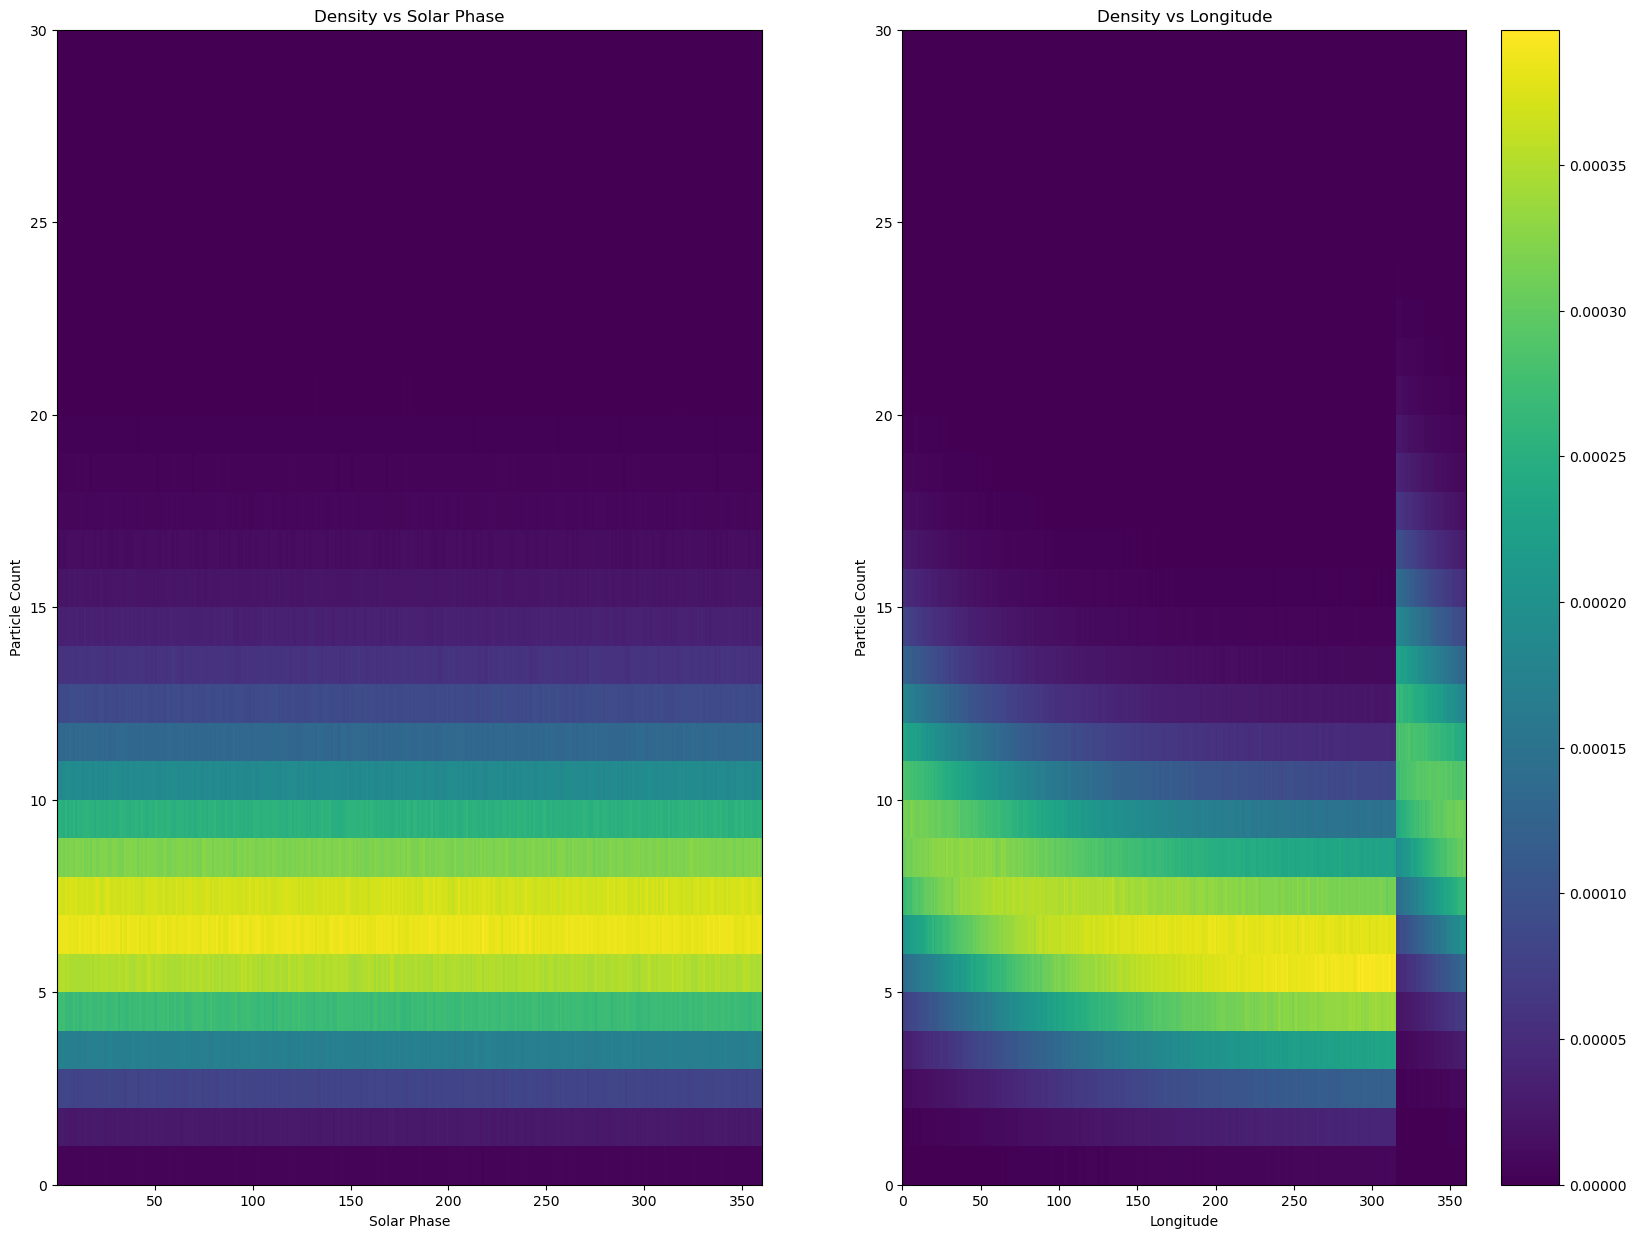

In [14]:
fig, ax = plt.subplots(1, 2)
p1 = ax[0].hist2d(data[1, :], data[3, :], bins=(360, 30), density=True)
plt.colorbar(p1[3])
ax[0].set_title("Density vs Solar Phase")
ax[0].set_ylabel("Particle Count")
ax[0].set_xlabel("Solar Phase")

p2 = ax[1].hist2d(data[2, :], data[3, :], bins=(360, 30), density=True)
ax[1].set_title("Density vs Longitude")
ax[1].set_ylabel("Particle Count")
ax[1].set_xlabel("Longitude")
plt.show()

We can see that the longitude affect the background. Which means the periodic signal contamination in the background that depends on longitude. Then we are going to look at poisson distribution for each degree of Longitude.

In [15]:
mean = [np.mean(data[3][i::54000]) for i in range(54000)]
long = [data[2][i] for i in range(54000)]

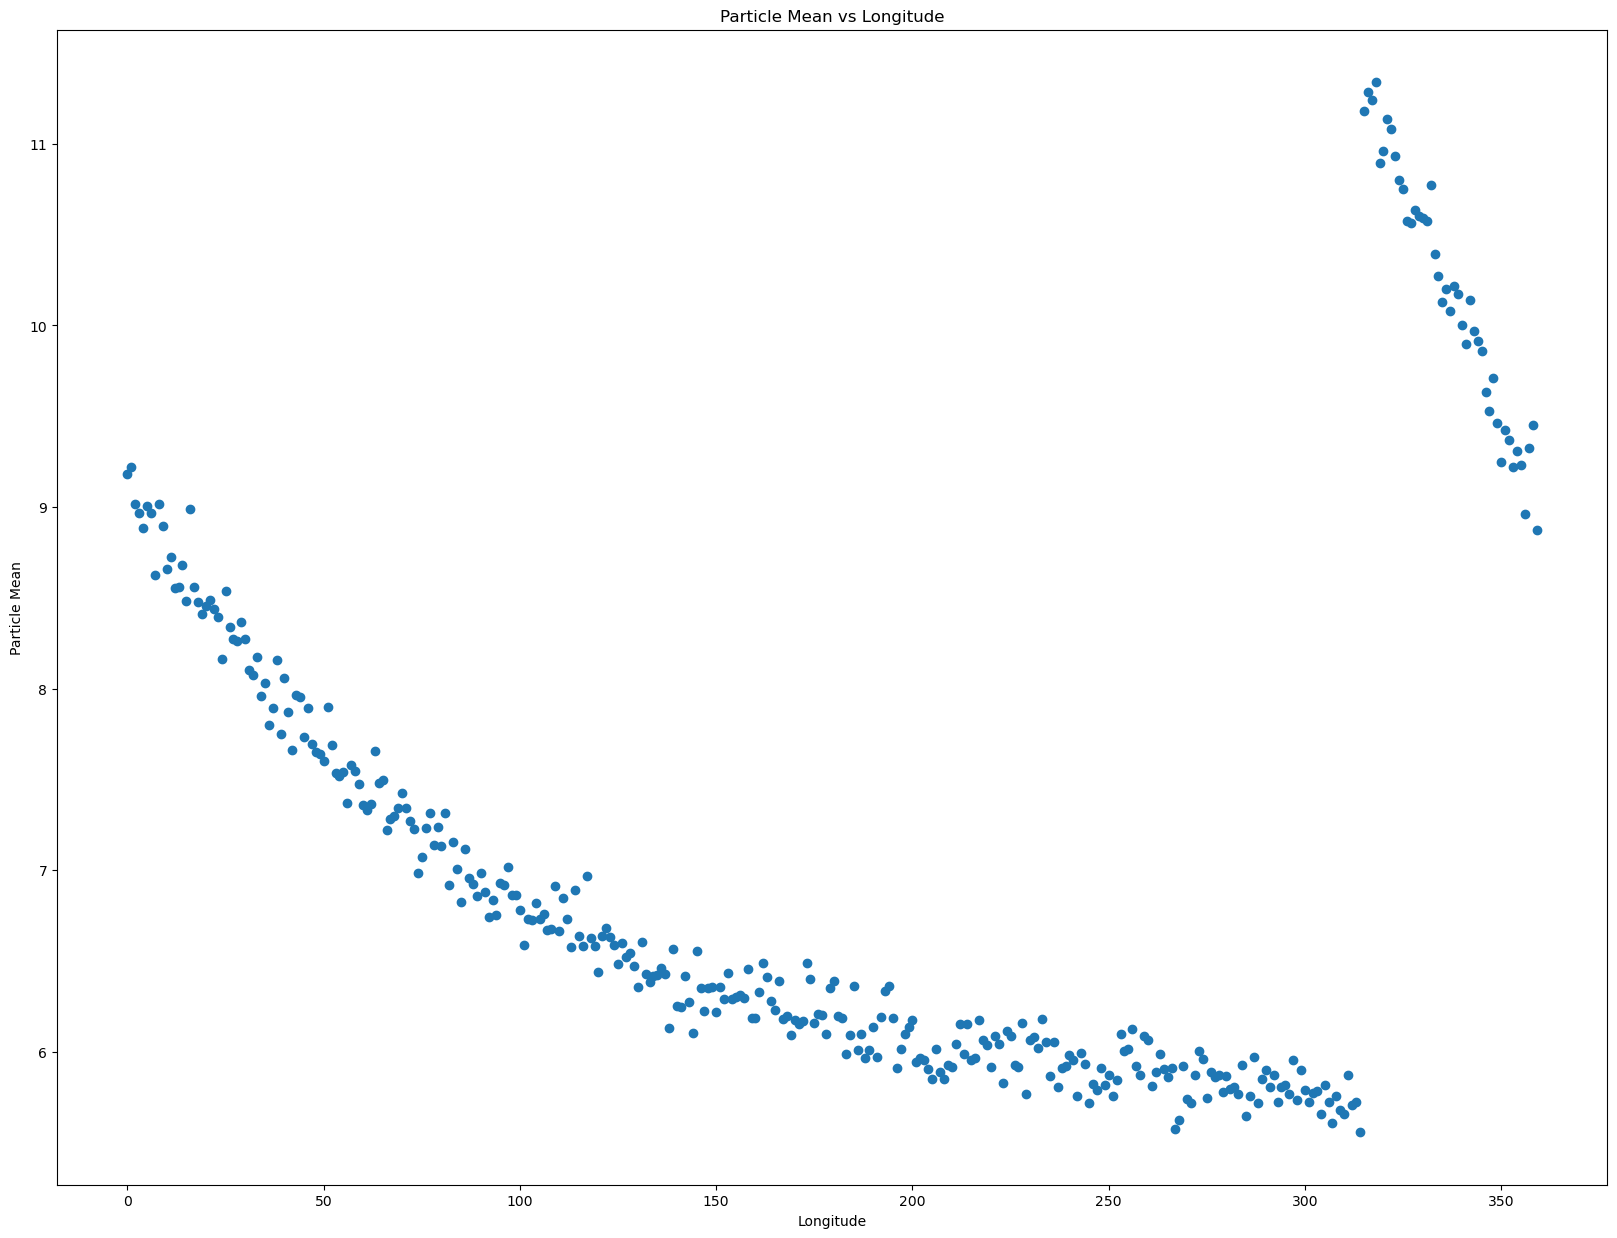

In [16]:
plt.title("Particle Mean vs Longitude")
plt.ylabel("Particle Mean")
plt.xlabel("Longitude")
plt.scatter(long[::150], mean[::150])
plt.show()

above is the scatter plot of mean of the particle count at each Longitude, which matches the 2D Histogram.Then we will calculated the PDF and PMF of the distribution.

In [17]:
def pdf(x, time):
    longvalue = data[2][time * 10]
    idx = (np.abs(long - longvalue)).argmin()
    return stats.poisson.pmf(x, mean[idx])

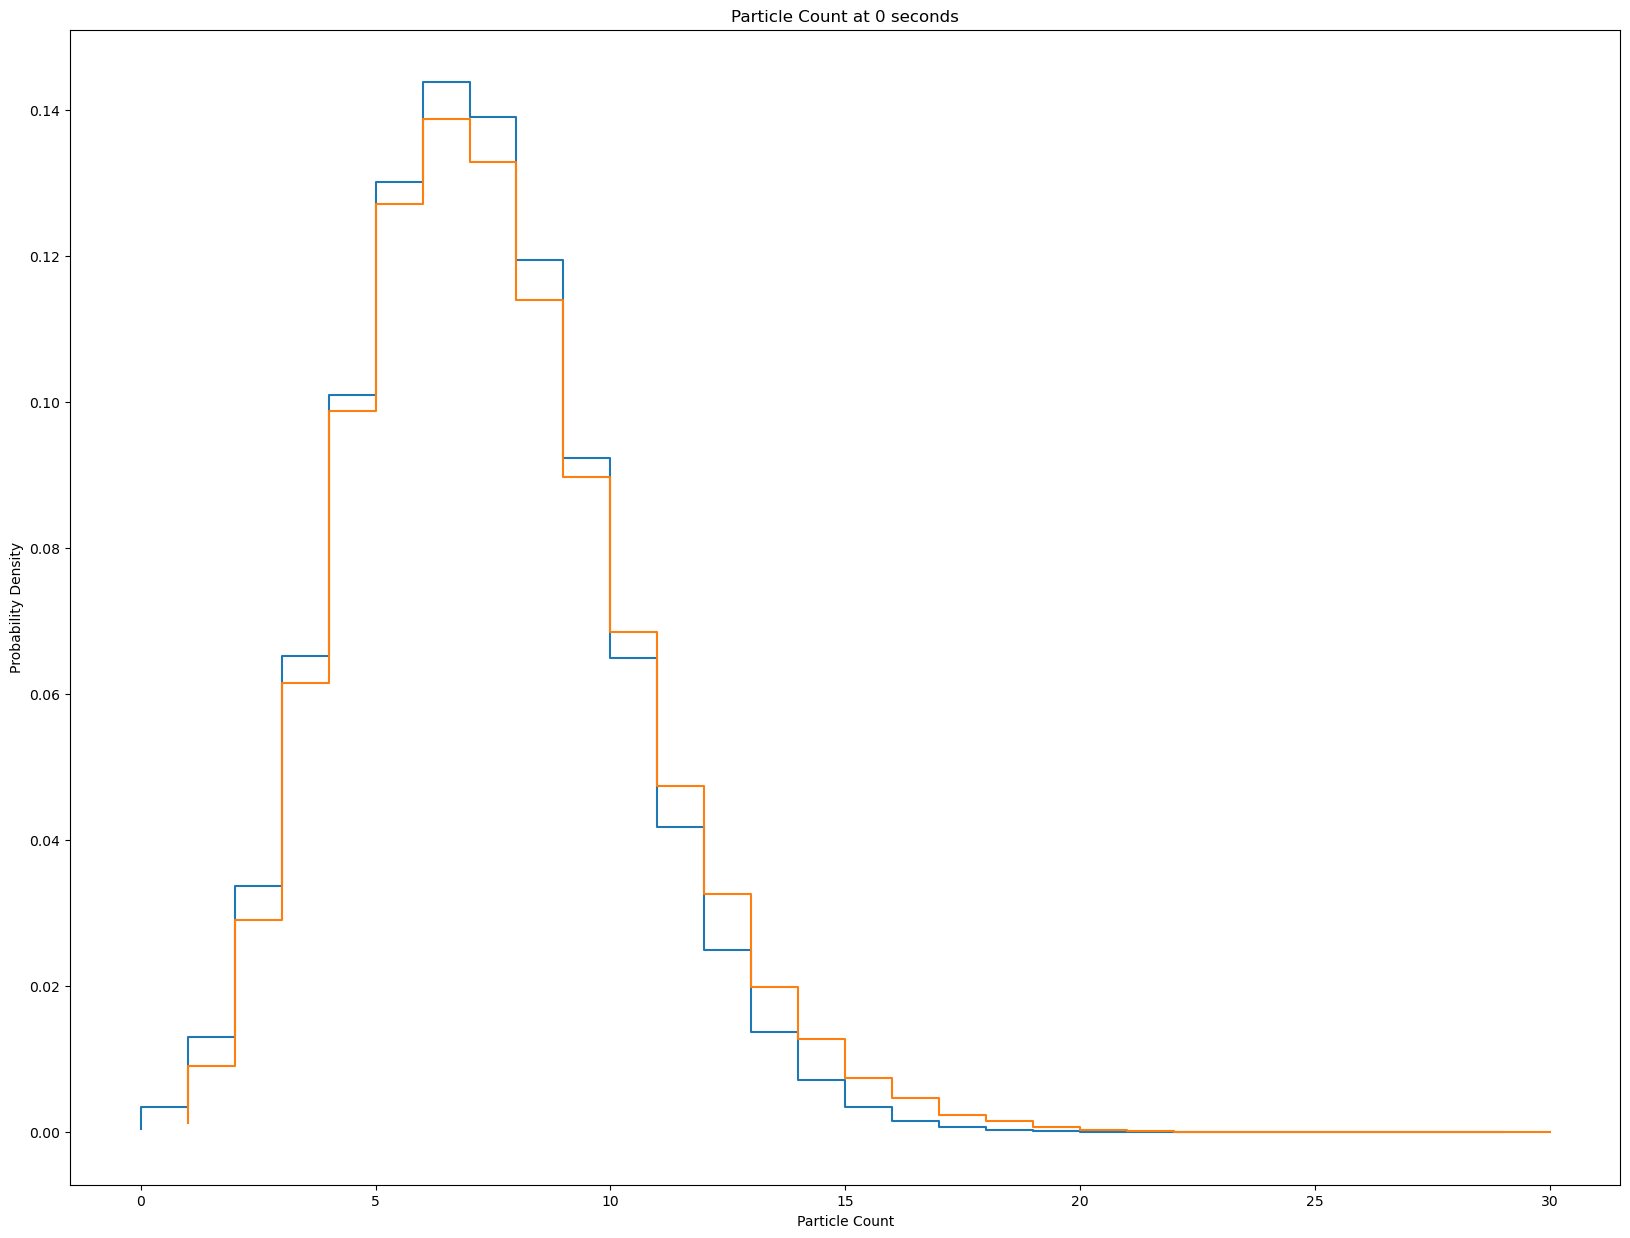

In [18]:
x = np.arange(0, 30)
plt.title("Particle Count at 0 seconds")
plt.ylabel("Probability Density")
plt.xlabel("Particle Count")
plt.step(x, pdf(x, 0))
longvalue = data[2][0 * 10]
factor = 1 / (sum(p1[0][int(longvalue)]))
plt.step(p1[2][1:], p1[0][int(longvalue), :] * factor)
plt.show()

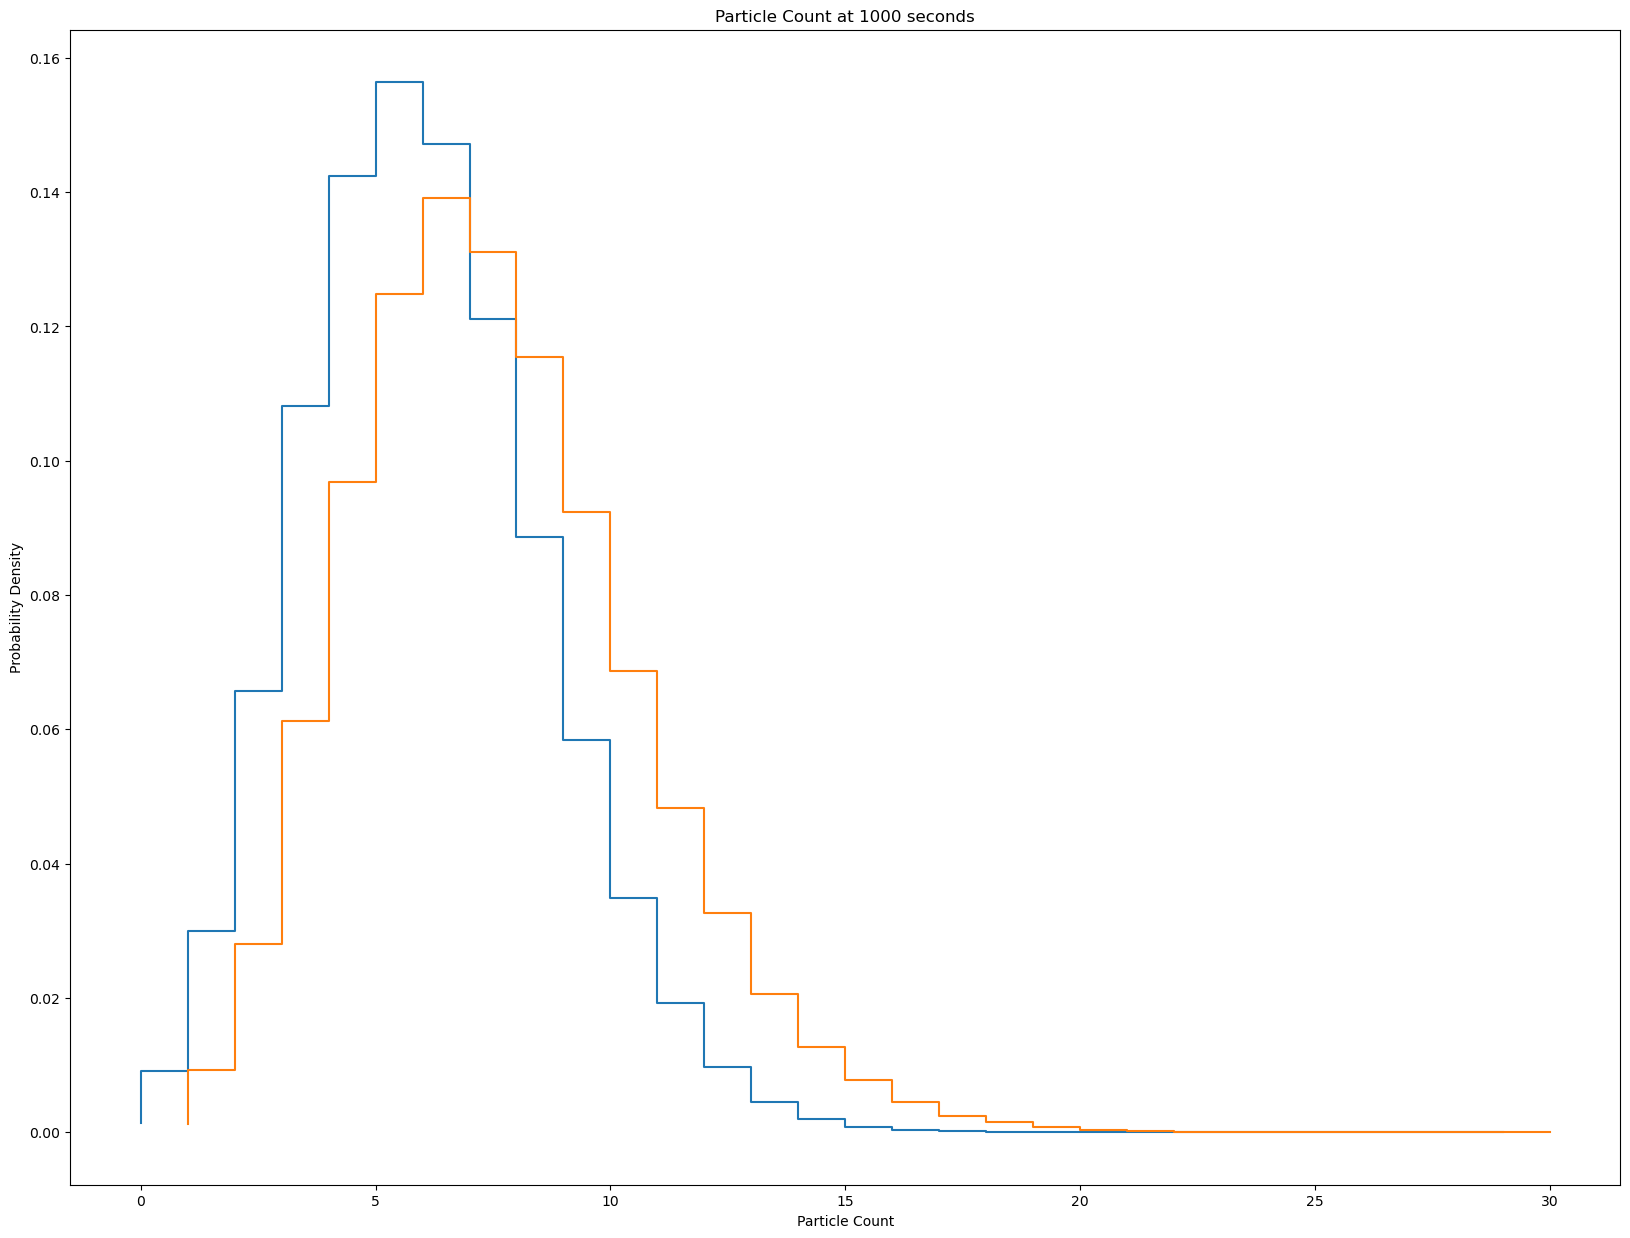

In [20]:
x = np.arange(0, 30)
plt.title("Particle Count at 1000 seconds")
plt.ylabel("Probability Density")
plt.xlabel("Particle Count")
plt.step(x, pdf(x, 1000))
longvalue = data[2][1000 * 10]
factor = 1 / sum(p1[0][int(longvalue)])
plt.step(p1[2][1:], p1[0][int(longvalue), :] * factor)
plt.show()

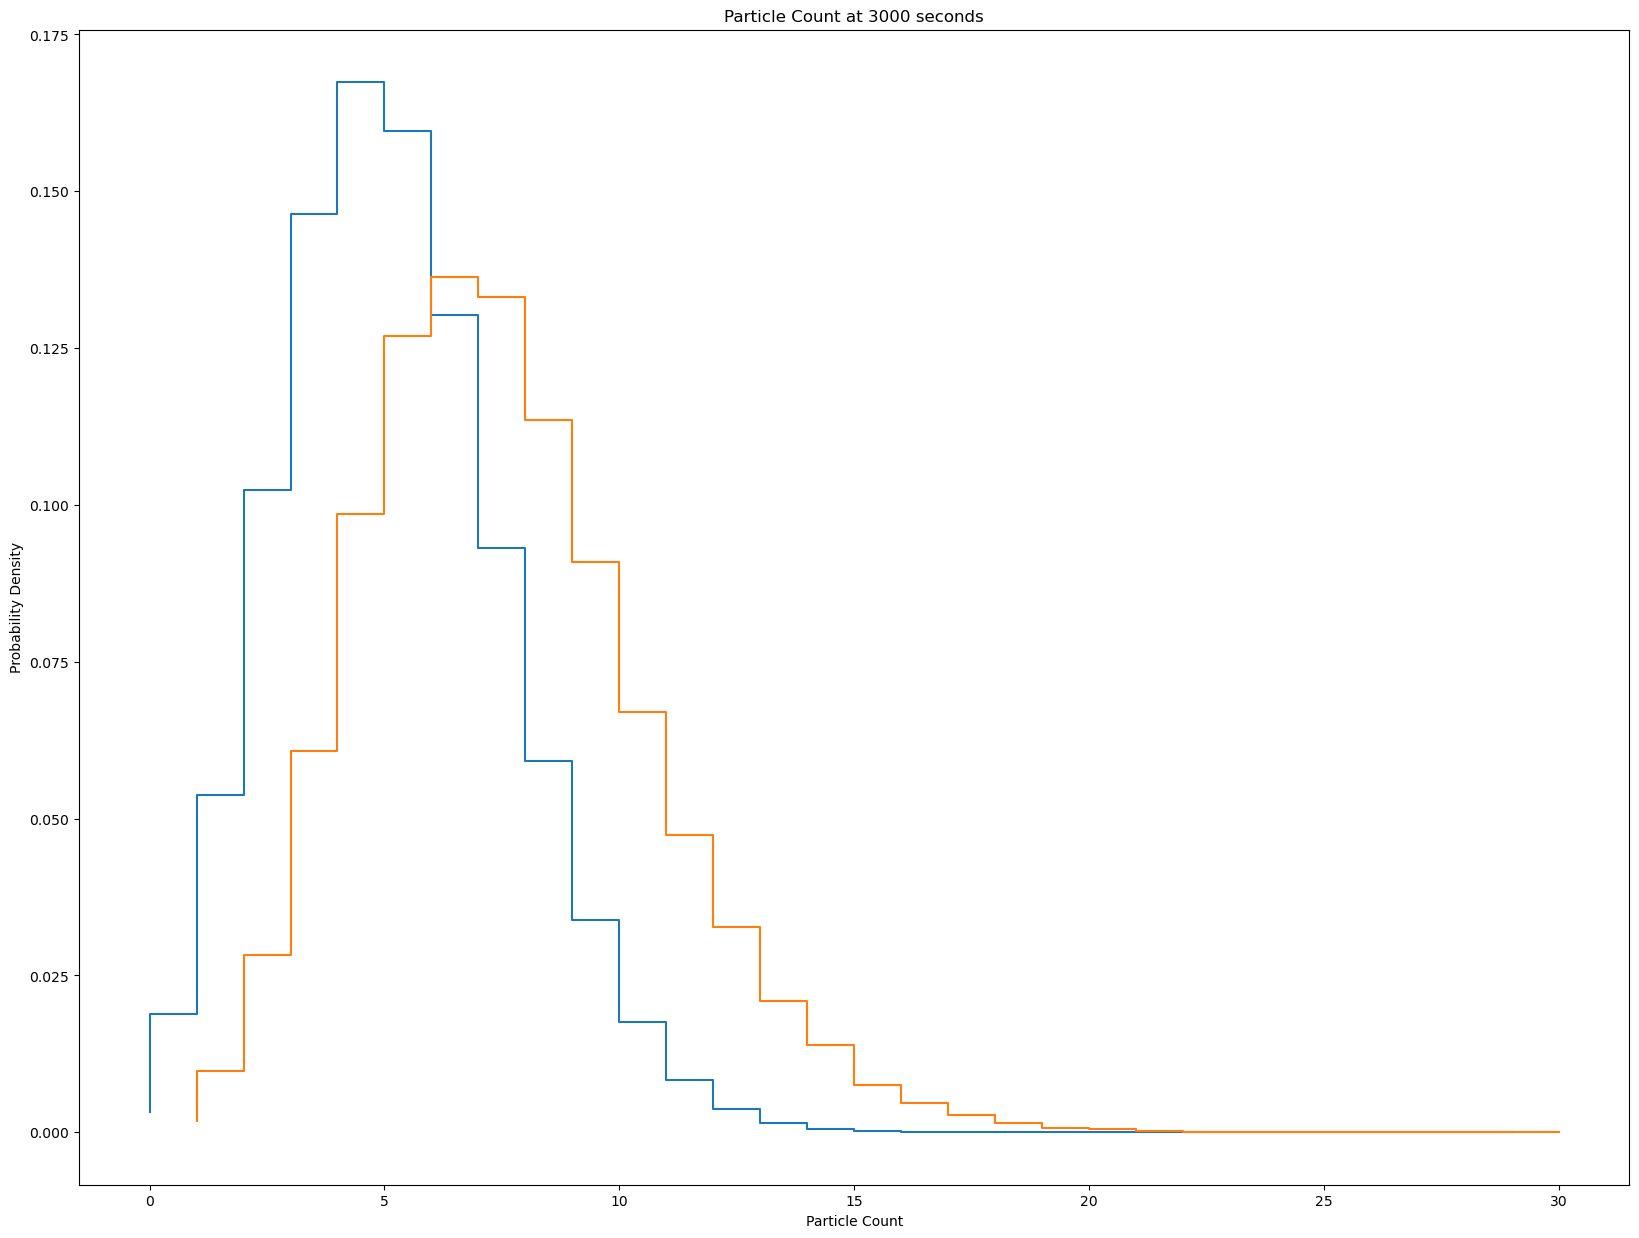

In [21]:
x = np.arange(0, 30)
plt.title("Particle Count at 3000 seconds")
plt.ylabel("Probability Density")
plt.xlabel("Particle Count")
plt.step(x, pdf(x, 3000))
longvalue = data[2][3000 * 10]
factor = 1 / sum(p1[0][int(longvalue)])
plt.step(p1[2][1:], p1[0][int(longvalue), :] * factor)
plt.show()

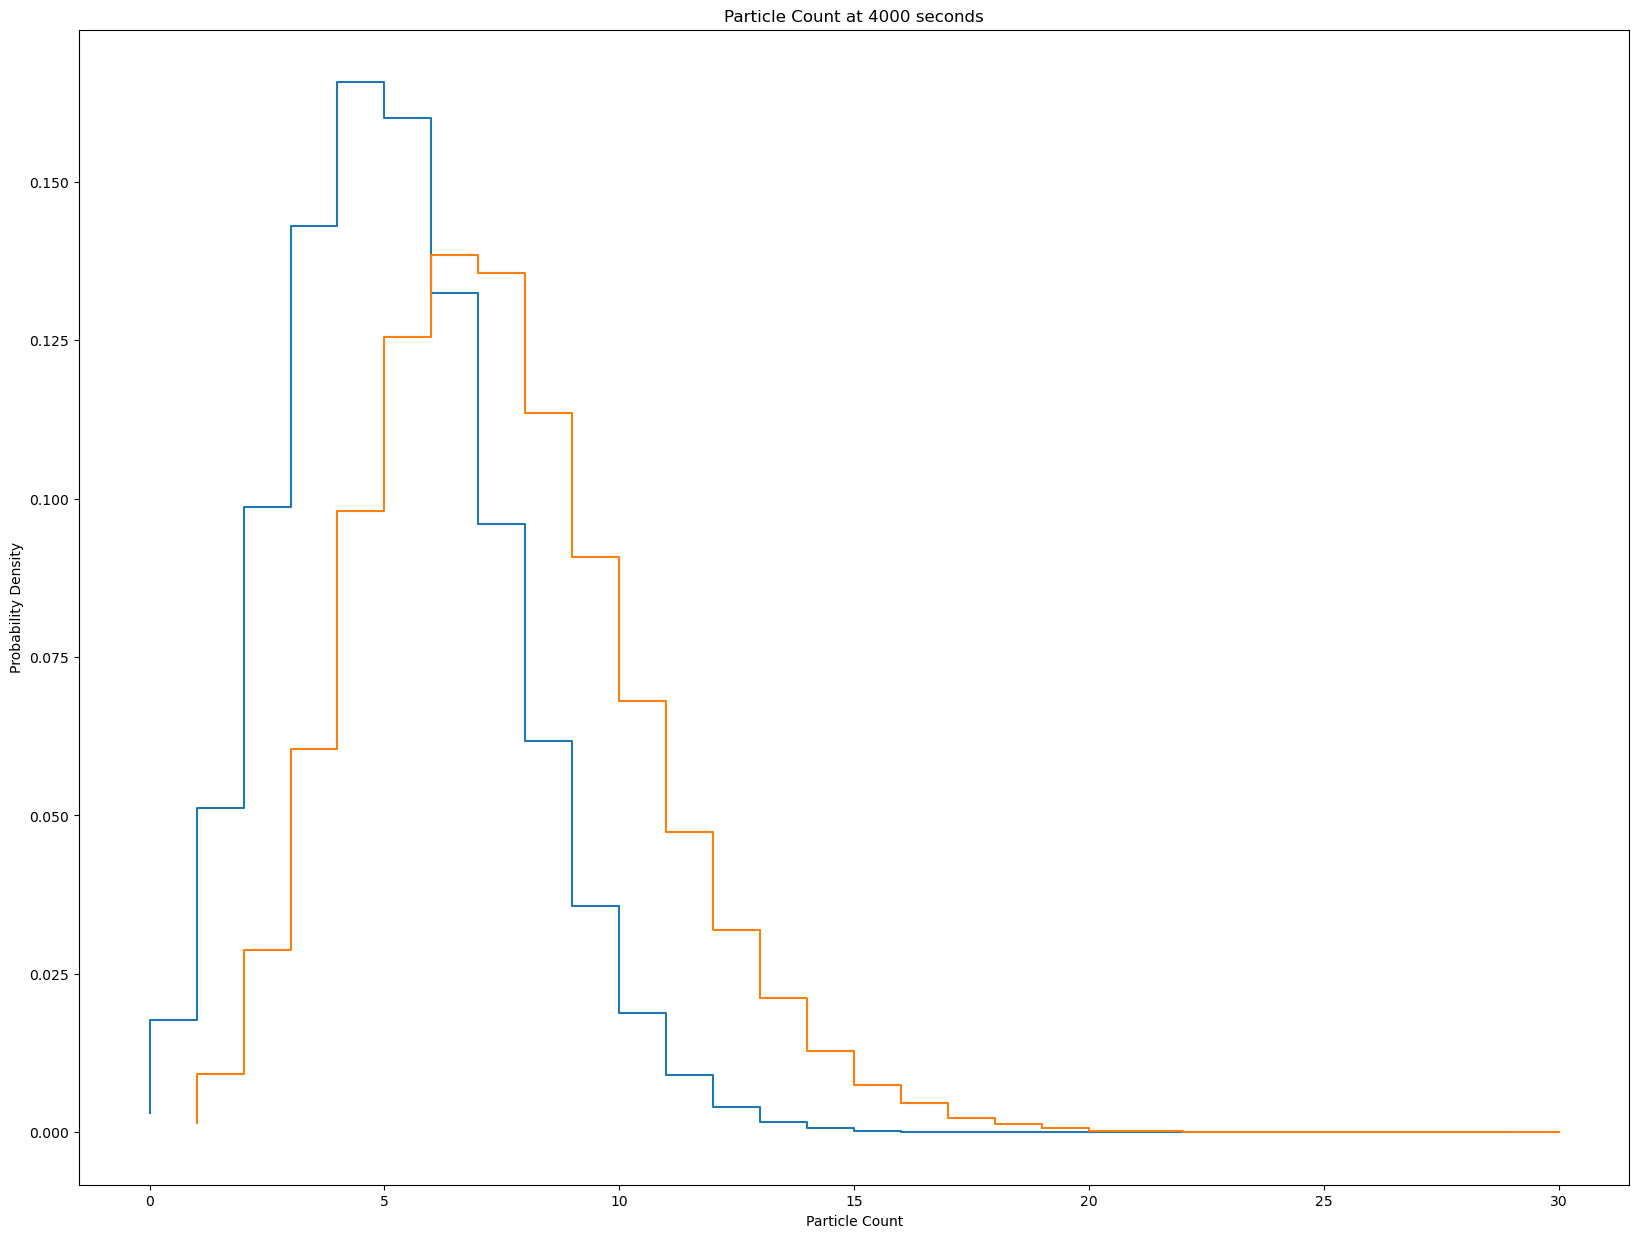

In [22]:
x = np.arange(0, 30)
plt.title("Particle Count at 4000 seconds")
plt.ylabel("Probability Density")
plt.xlabel("Particle Count")
plt.step(x, pdf(x, 4000))
longvalue = data[2][4000 * 10]
factor = 1 / sum(p1[0][int(longvalue)])
plt.step(p1[2][1:], p1[0][int(longvalue), :] * factor)
plt.show()

In [23]:
prob = stats.norm.cdf(5)

In [26]:
def sigma5(time):
    longvalue = data[2][time * 10]
    idx = (np.abs(long - longvalue)).argmin()
    th = stats.poisson.ppf(prob, mu = mean[idx])
    return th

In [27]:
sigma5(3000)

21.0

In [28]:
sigma5(0)

25.0

In [29]:
sigma5(4100)

32.0

In [30]:
sigma5(1000)

23.0

the threshold changes for different longitudes. From 21 to 32 for different longitudes(time).

## Problem 2

1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.

In [31]:
hf = h5py.File('images.h5', 'r')

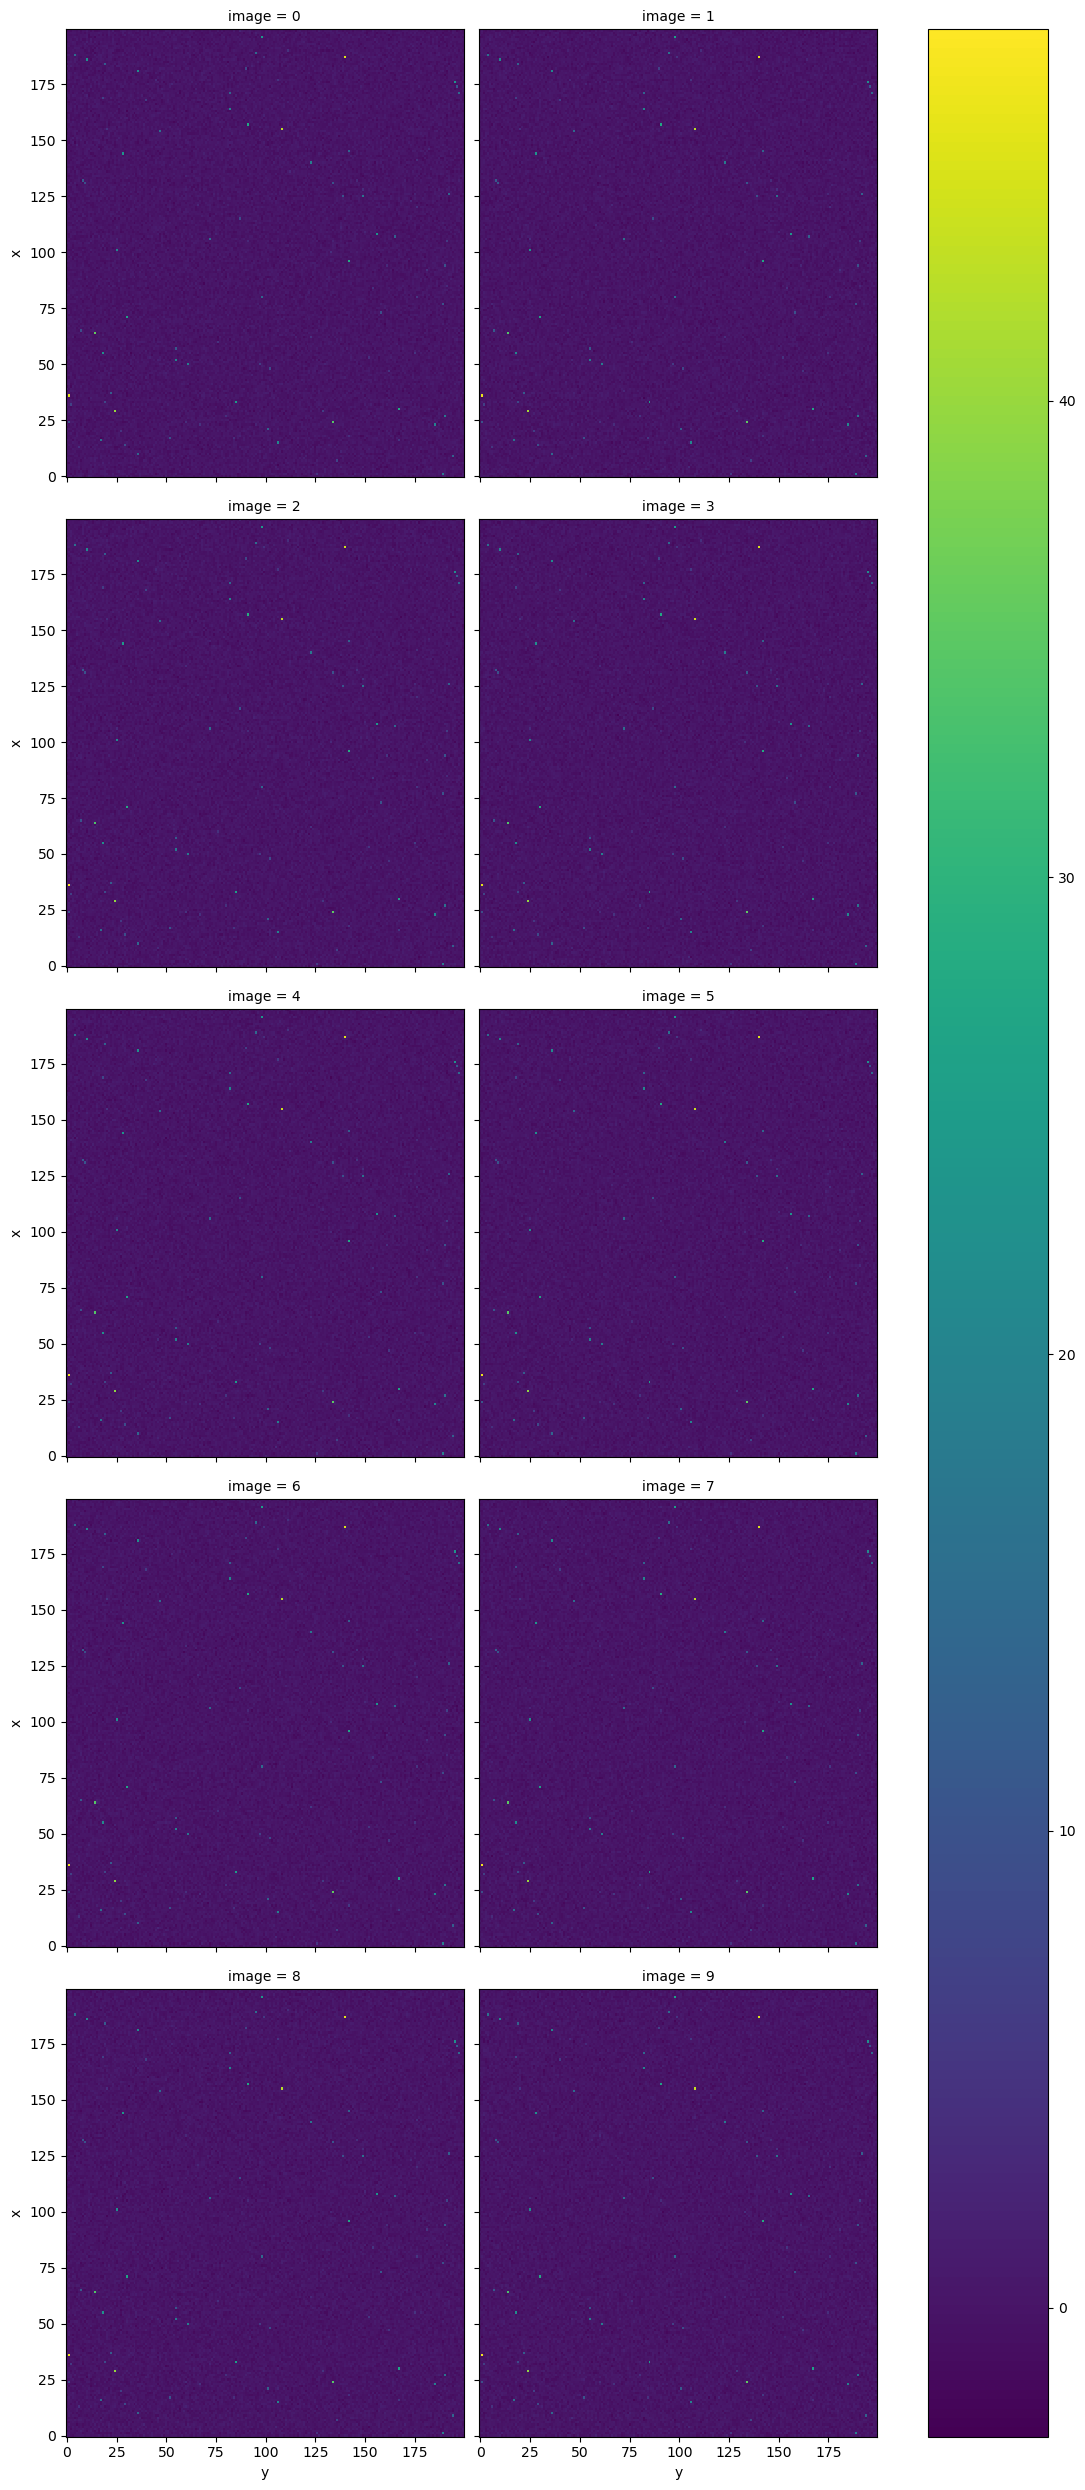

In [32]:
stack = xr.DataArray(hf.get('imagestack')[:,:,:], coords=[np.arange(200), np.arange(200), np.arange(10)], dims=['x','y','image']).transpose('image','x','y')
stack.plot(center=False, col='image', col_wrap=2, size=5)
hf.close()
plt.show()

2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

The 10 images have some significant signal contamination. The back ground is not time dependent. It is consistent spatially. My plan to calculate the background's pdf() is sum the pictures and then remove outliers at a threshold.

3) Using your background distribution, hunt for your signal (faint stars). Describe what you find.

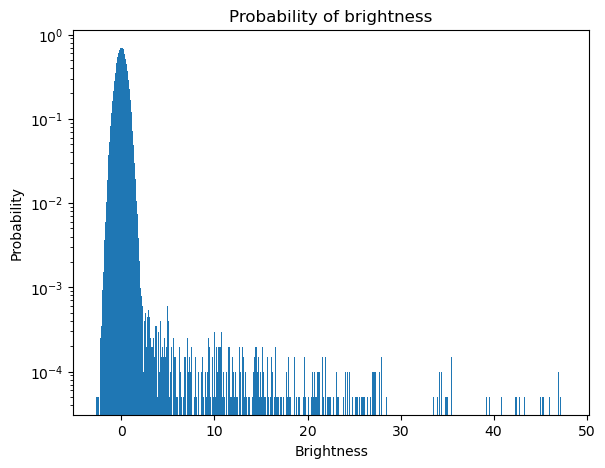

In [41]:
stack.plot.hist(bins=1000, density=True, size=5)
plt.title("Probability of brightness")
plt.ylabel("Probability")
plt.xlabel("Brightness")
plt.yscale('log')
plt.show()

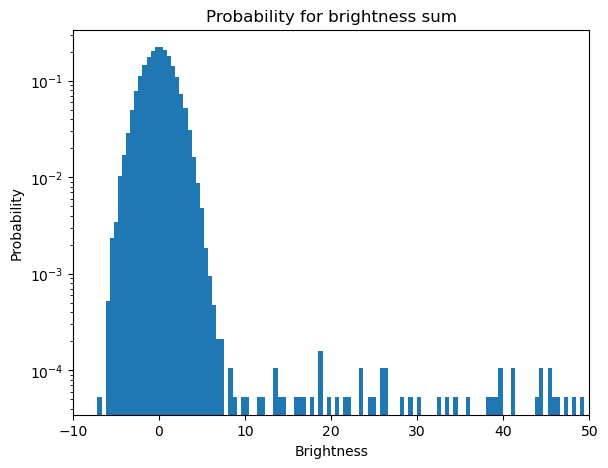

In [47]:
stacksum = sum(stack)
stacksum.plot.hist(bins=1000, density=True, size=5)
plt.title("Probability for brightness sum")
plt.ylabel("Probability")
plt.xlabel("Brightness")
plt.yscale('log')
plt.xlim([-10, 50])
plt.show()

In [46]:
trim = stacksum.where(stacksum<10)
mean = trim.mean().values
std = trim.std().values

In [48]:
mean

array(-0.00129266)

In [49]:
std

array(1.77834896)

background brightness has a mean of -0.001 and a standard deviation of 1.778. 

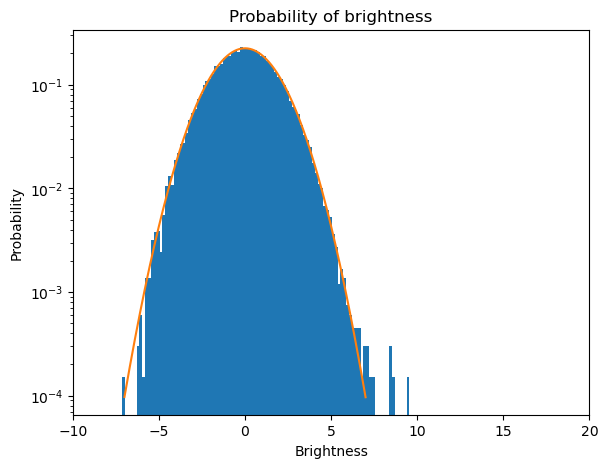

In [55]:
trim.plot.hist(bins=100,density=True,size=5)
pdf = stats.norm.pdf(x,loc=mean,scale=std)
plt.plot(np.linspace(-7,7,1000),pdf)
plt.title("Probability of brightness")
plt.ylabel("Probability")
plt.xlabel("Brightness")
plt.xlim([-10,20])
plt.yscale('log')
plt.show()

Now we are going to determine the threshold to define a faint star.

In [60]:
def th(sigma):
    prob = stats.norm.cdf(sigma)
    th = stats.norm.ppf(prob, loc=mean, scale=std)
    n = stacksum.where(stacksum > th).count().values
    print(th)
    print(n)

In [61]:
th(5)

8.890452150305274
125


So with 5 sigma certainty that there are 125 stars with brightness 8.88

In [62]:
th(7)

12.447139842828557
121


So with 7 sigma certainty that there are 121 stars with brightness 12.45. $125-121=4$ stars are between brightness 8.88 and 12.45.
The reason why my partner and I have different pdf because we are looking at the different things. To look for a transient, the pdf would be taking average of all the images and then subtracting each image from the average.